In [6]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\acer\anaconda3\lib\site-packages (2.2.2)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
df = pd.read_csv(r'C:\Users\ACER\Downloads\loan_prediction_dataset.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP00001,Male,Yes,2,Graduate,Yes,6072,1679,658,360,0.0,Urban,Y
1,LP00002,Male,Yes,1,Graduate,Yes,24962,8928,529,120,0.0,Rural,N
2,LP00003,Male,Yes,3+,Not Graduate,No,6594,3527,444,360,1.0,Semiurban,Y
3,LP00004,Female,No,2,Graduate,No,19071,2045,487,360,0.0,Rural,N
4,LP00005,Male,Yes,0,Graduate,No,4114,3814,203,240,0.0,Semiurban,N


In [14]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


<Axes: xlabel='Loan_Status', ylabel='count'>

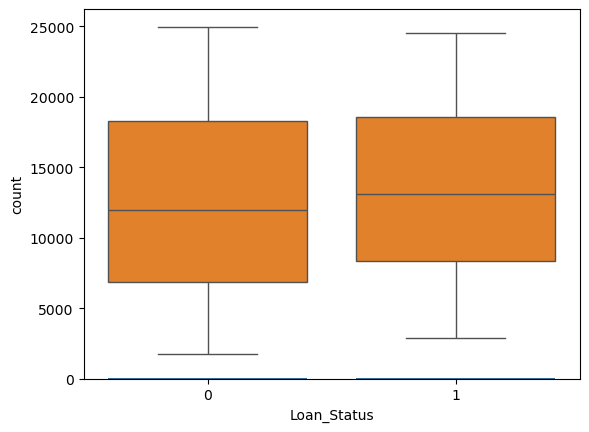

In [18]:
sns.countplot(x='Loan_Status', data=df)
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)


<Axes: >

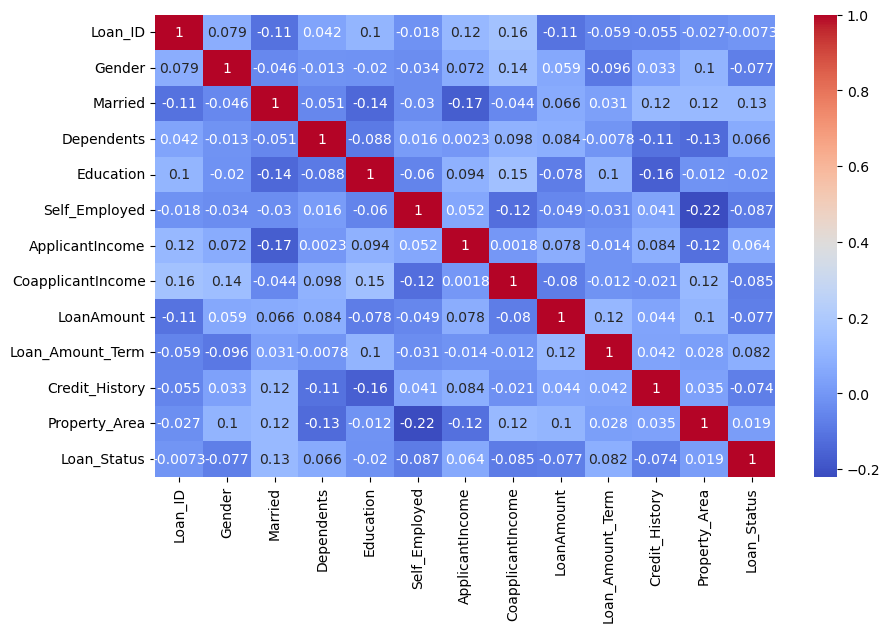

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [22]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
pip install pandas seaborn scikit-learn matplotlib


In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred = model.predict(X_test)


In [28]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[4 9]
 [3 4]]
              precision    recall  f1-score   support

           0       0.57      0.31      0.40        13
           1       0.31      0.57      0.40         7

    accuracy                           0.40        20
   macro avg       0.44      0.44      0.40        20
weighted avg       0.48      0.40      0.40        20

Accuracy: 0.4


In [30]:
import joblib
joblib.dump(model, 'loan_approval_model.pkl')


['loan_approval_model.pkl']